# Backstage

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.pyplot import cm
# import pprint

import math

import scipy.stats as st

In [ ]:
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (22, 9)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 4
plt.rcParams['font.sans-serif'] = ['Verdana', 'Lucida Sans', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.family'] = 'sans-serif'
# plt.rcParams.keys()

In [ ]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Celestial Body Class

In [ ]:
class Celestial_Body:

    def __init__(self, name='', mass=0, x=50):
        self.name = name
        self.mass = mass
        self.x = x

# Gravity Wells

In [ ]:
def desenha_gwell(corpos, x, scale=5):
    if isinstance(corpos, list): corpos = set(corpos)
    elif not isinstance(corpos, set): corpos = set([corpos])

    fig, ax = plt.subplots()

    # ax.set_xlabel('Posição')
    # ax.set_ylabel('Intensidade da Distorção')

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax.set_xticks([])
    ax.set_yticks([])

    for corpo in corpos:
        y = -corpo.mass * st.norm.pdf(x, loc=corpo.x, scale=scale)
        ax.plot(x, y, label=corpo.name)

    despine()

    ax.legend(loc='lower right')

    plt.show()

In [ ]:
Gargantua = Celestial_Body('Gargantua', 100)
step = 25
Moons = [Celestial_Body('Moon ' + str(int(i/step)), 5, i) for i in range(0, 125, step)]
Sol = Celestial_Body('Sol', 20, 30)

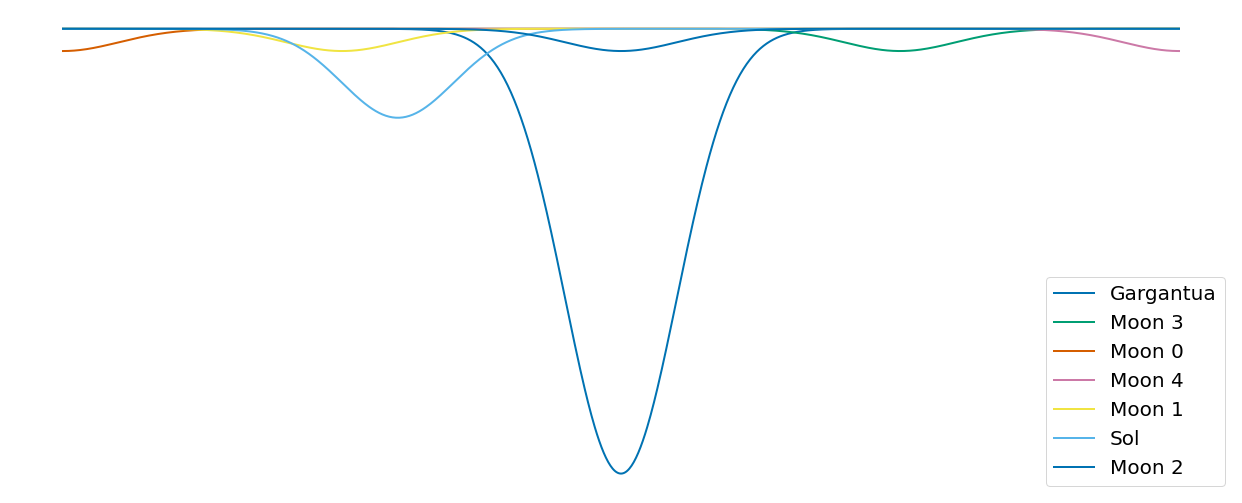

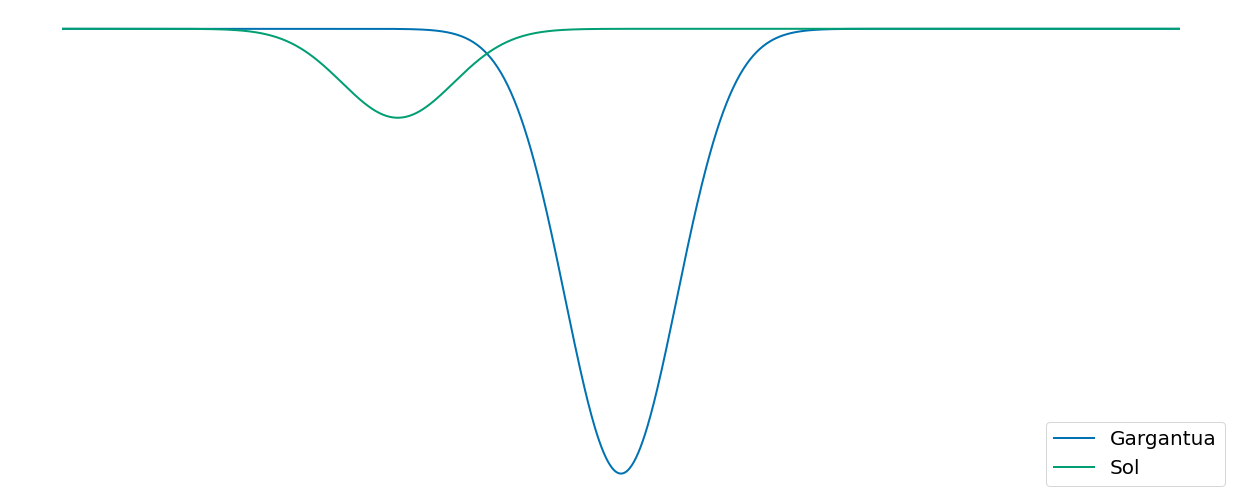

In [ ]:
start = 0
end = 100
n = 1000

x = np.linspace(start, end, n)

ratio = .05

scale = (end - start) * ratio

desenha_gwell([Gargantua, *Moons, Sol], x, scale)
desenha_gwell([Gargantua, Sol], x, scale)

# Spacetime Fabric

In [ ]:
def calc_gravity(corpos, x, scale, y):
    if isinstance(corpos, list): corpos = set(corpos)
    elif not isinstance(corpos, set): corpos = set([corpos])

    fig, ax = plt.subplots()

    # ax.set_xlabel('Posição')
    # ax.set_ylabel('Intensidade da Distorção')

    ax.set_yticklabels([])
    ax.set_xticklabels([])

    ax.set_xticks([])
    ax.set_yticks([])

    for corpo in corpos:
            y -= corpo.mass * st.norm.pdf(x, loc=corpo.x, scale=scale)

    ax.plot(x, y)

    despine()

    plt.title('Efeito acumulado da atração gravitacional de vários corpos')

    plt.show()

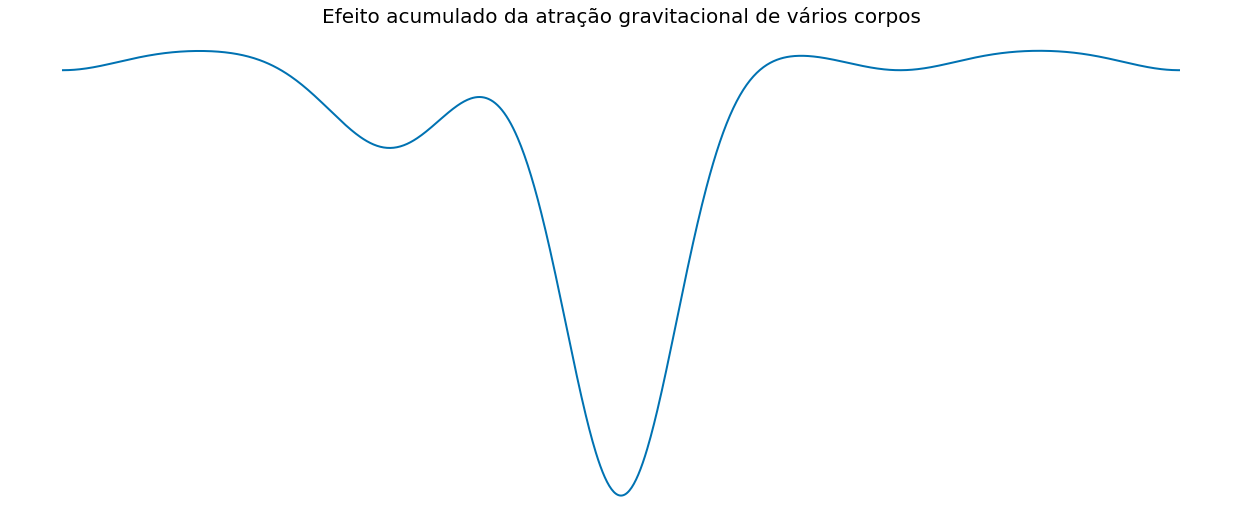

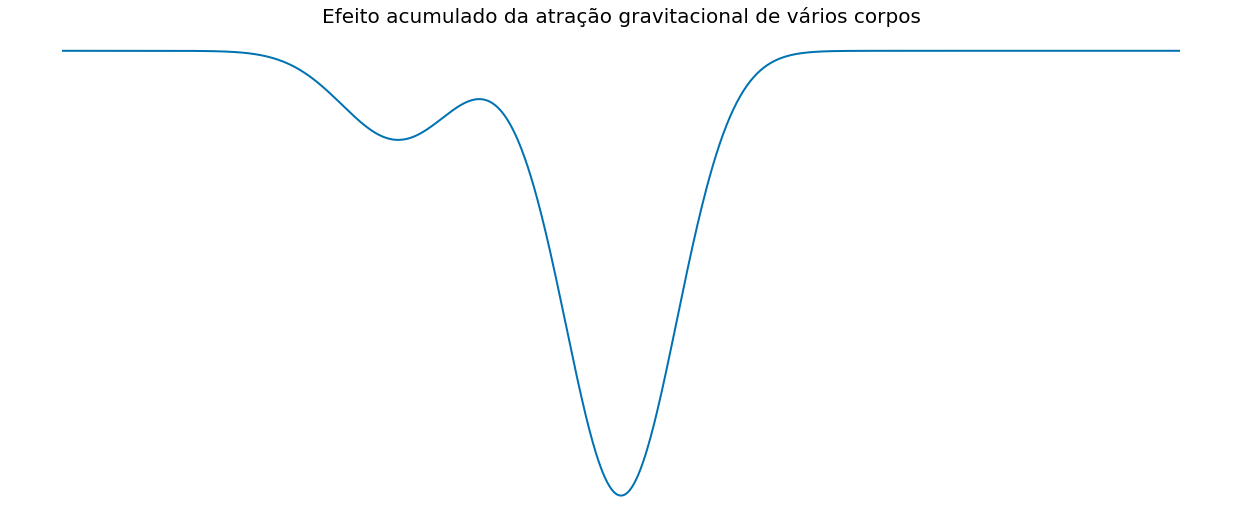

In [ ]:
start = 0
end = 100
n = 1000

x = np.linspace(start, end, n)

ratio = .05

scale = (end - start) * ratio

y = np.zeros(n)

calc_gravity([Gargantua, *Moons, Sol], x, scale, y)

y = np.zeros(n)

calc_gravity([Gargantua, Sol], x, scale, y)